In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Composition

In [2]:
#Read Composition files from Rüdiger
df=pd.read_csv("input_data/remnant_composition.csv")

In [3]:
df.columns

Index(['r_inner,', 'r_outer,', 'mass,', 'density,', 'l_z,', 'v_r,', 'u,', 'p,',
       'T,', 'xn_n,', 'xn_p,', 'xn_he4,', 'xn_b11,', 'xn_c12,', 'xn_c13,',
       'xn_n13,', 'xn_n14,', 'xn_n15,', 'xn_o15,', 'xn_o16,', 'xn_o17,',
       'xn_f18,', 'xn_ne19,', 'xn_ne20,', 'xn_ne21,', 'xn_ne22,', 'xn_na22,',
       'xn_na23,', 'xn_mg23,', 'xn_mg24,', 'xn_mg25,', 'xn_mg26,', 'xn_al25,',
       'xn_al26,', 'xn_al27,', 'xn_si28,', 'xn_si29,', 'xn_si30,', 'xn_p29,',
       'xn_p30,', 'xn_p31,', 'xn_s31,', 'xn_s32,', 'xn_s33,', 'xn_cl33,',
       'xn_cl34,', 'xn_cl35,', 'xn_ar36,', 'xn_ar37,', 'xn_ar38,', 'xn_ar39,',
       'xn_k39,', 'xn_ca40,', 'xn_sc43,', 'xn_ti44,', 'xn_v47,', 'xn_cr48,',
       'xn_mn51,', 'xn_fe52,', 'xn_fe54,', 'xn_co55,', 'xn_ni56,', 'xn_ni58,',
       'xn_ni59'],
      dtype='object')

In [4]:
###Add He and O18 but make them 0
df['xn_he3,'] = 0.0e0
df['xn_o18,'] = 0.0e0
df['xn_p,'] = 0.0e0
df["embedded_mass"]=df["mass,"].cumsum()


In [5]:
columns_to_keep = ['mass,','embedded_mass','r_outer,', 'xn_p,','xn_he3,', 'xn_he4,','xn_c12,','xn_n14,','xn_o16,','xn_o18,','xn_ne20,','xn_ne22,','xn_mg24,'
                   ,'xn_si28,','xn_ni56,']
df=df[columns_to_keep]
columns_to_move = df[['mass,','embedded_mass','r_outer,']]
df = df.drop(columns_to_move, axis=1)
df= df.div(df.sum(axis=1), axis=0) #Since originally we had more elements we need to renomarlize
print(df)

     xn_p,  xn_he3,       xn_he4,   xn_c12,       xn_n14,   xn_o16,  xn_o18,  \
0      0.0      0.0  7.326613e-08  0.500000  1.400005e-29  0.500000      0.0   
1      0.0      0.0  6.945016e-08  0.500000  1.400005e-29  0.500000      0.0   
2      0.0      0.0  8.055901e-08  0.500000  1.400005e-29  0.500000      0.0   
3      0.0      0.0  1.174176e-07  0.500000  1.400008e-29  0.500000      0.0   
4      0.0      0.0  1.636196e-07  0.500000  1.400011e-29  0.500000      0.0   
..     ...      ...           ...       ...           ...       ...      ...   
995    0.0      0.0  1.209771e-02  0.086631  1.284106e-07  0.075399      0.0   
996    0.0      0.0  1.200465e-02  0.086093  1.262179e-07  0.074902      0.0   
997    0.0      0.0  1.191616e-02  0.085382  1.259060e-07  0.074036      0.0   
998    0.0      0.0  1.182647e-02  0.087280  1.293872e-07  0.075689      0.0   
999    0.0      0.0  1.172040e-02  0.087855  1.283052e-07  0.076115      0.0   

         xn_ne20,      xn_ne22,      xn

In [6]:
df.insert(0, 'mass', columns_to_move['mass,']) #get the column q_m back which starts now at surface
df.insert(1, 'e_mass', columns_to_move['embedded_mass'])
df.insert(2, 'r_out', columns_to_move['r_outer,'])

In [7]:
gravity=df["e_mass"]/df["r_out"]
from astropy.constants import G,m_p
gravity=G.cgs*gravity
nickel=5.38*df["xn_ni56,"]*(1.6e-6)/(56*m_p.cgs) #5.38 MeV from Ni56 to Iron

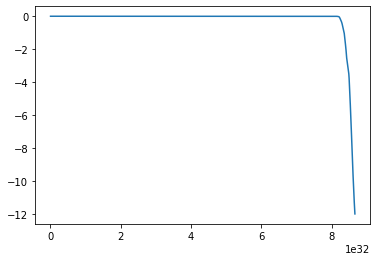

In [8]:
import matplotlib.pyplot as plt
plt.plot(df["e_mass"]*0.66,-(nickel)/gravity)
#plt.xlim(0.5,0.7)
#plt.plot((0.5,0.7),(-3,-3))


In [9]:
print(df)

             mass        e_mass         r_out  xn_p,  xn_he3,       xn_he4,  \
0    1.312658e+30  1.312658e+30  4.916621e+07    0.0      0.0  7.326613e-08   
1    1.312686e+30  2.625344e+30  6.194260e+07    0.0      0.0  6.945016e-08   
2    1.312821e+30  3.938165e+30  7.101204e+07    0.0      0.0  8.055901e-08   
3    1.312681e+30  5.250846e+30  7.829346e+07    0.0      0.0  1.174176e-07   
4    1.312702e+30  6.563547e+30  8.443594e+07    0.0      0.0  1.636196e-07   
..            ...           ...           ...    ...      ...           ...   
995  1.312750e+30  1.307479e+33  1.273202e+10    0.0      0.0  1.209771e-02   
996  1.312809e+30  1.308791e+33  1.320250e+10    0.0      0.0  1.200465e-02   
997  1.312757e+30  1.310104e+33  1.369599e+10    0.0      0.0  1.191616e-02   
998  1.312708e+30  1.311417e+33  1.419352e+10    0.0      0.0  1.182647e-02   
999  1.312887e+30  1.312730e+33  1.468800e+10    0.0      0.0  1.172040e-02   

      xn_c12,       xn_n14,   xn_o16,  xn_o18,     

In [10]:
diff=np.abs((-nickel/gravity)+2).argmin()
print(diff)
df = df.drop(df.index[diff:])
print(df)

970
             mass        e_mass         r_out  xn_p,  xn_he3,       xn_he4,  \
0    1.312658e+30  1.312658e+30  4.916621e+07    0.0      0.0  7.326613e-08   
1    1.312686e+30  2.625344e+30  6.194260e+07    0.0      0.0  6.945016e-08   
2    1.312821e+30  3.938165e+30  7.101204e+07    0.0      0.0  8.055901e-08   
3    1.312681e+30  5.250846e+30  7.829346e+07    0.0      0.0  1.174176e-07   
4    1.312702e+30  6.563547e+30  8.443594e+07    0.0      0.0  1.636196e-07   
..            ...           ...           ...    ...      ...           ...   
965  1.312778e+30  1.268097e+33  3.471213e+09    0.0      0.0  8.956960e-03   
966  1.312738e+30  1.269409e+33  3.684076e+09    0.0      0.0  9.747162e-03   
967  1.312661e+30  1.270722e+33  3.889459e+09    0.0      0.0  1.016224e-02   
968  1.312830e+30  1.272035e+33  4.086974e+09    0.0      0.0  1.049291e-02   
969  1.312666e+30  1.273348e+33  4.285521e+09    0.0      0.0  1.073526e-02   

      xn_c12,       xn_n14,   xn_o16,  xn_o18, 

In [11]:
df["e_m"]=(df["e_mass"]/df["mass"].sum())
df["q_m"]=1.0e00-df["e_m"]
df.loc[df['q_m'] < 0, 'q_m'] = 0 #Due to numerics
print(df)

             mass        e_mass         r_out  xn_p,  xn_he3,       xn_he4,  \
0    1.312658e+30  1.312658e+30  4.916621e+07    0.0      0.0  7.326613e-08   
1    1.312686e+30  2.625344e+30  6.194260e+07    0.0      0.0  6.945016e-08   
2    1.312821e+30  3.938165e+30  7.101204e+07    0.0      0.0  8.055901e-08   
3    1.312681e+30  5.250846e+30  7.829346e+07    0.0      0.0  1.174176e-07   
4    1.312702e+30  6.563547e+30  8.443594e+07    0.0      0.0  1.636196e-07   
..            ...           ...           ...    ...      ...           ...   
965  1.312778e+30  1.268097e+33  3.471213e+09    0.0      0.0  8.956960e-03   
966  1.312738e+30  1.269409e+33  3.684076e+09    0.0      0.0  9.747162e-03   
967  1.312661e+30  1.270722e+33  3.889459e+09    0.0      0.0  1.016224e-02   
968  1.312830e+30  1.272035e+33  4.086974e+09    0.0      0.0  1.049291e-02   
969  1.312666e+30  1.273348e+33  4.285521e+09    0.0      0.0  1.073526e-02   

      xn_c12,       xn_n14,   xn_o16,  xn_o18,     

In [12]:
df=df.drop("e_m", axis=1)
df=df.drop("r_out",axis=1)
df=df.drop("e_mass",axis=1)
df=df.drop("mass",axis=1)

In [13]:
df["q_m"]=df["q_m"]/df["q_m"].max()
print(df)

     xn_p,  xn_he3,       xn_he4,   xn_c12,       xn_n14,   xn_o16,  xn_o18,  \
0      0.0      0.0  7.326613e-08  0.500000  1.400005e-29  0.500000      0.0   
1      0.0      0.0  6.945016e-08  0.500000  1.400005e-29  0.500000      0.0   
2      0.0      0.0  8.055901e-08  0.500000  1.400005e-29  0.500000      0.0   
3      0.0      0.0  1.174176e-07  0.500000  1.400008e-29  0.500000      0.0   
4      0.0      0.0  1.636196e-07  0.500000  1.400011e-29  0.500000      0.0   
..     ...      ...           ...       ...           ...       ...      ...   
965    0.0      0.0  8.956960e-03  0.297889  3.441055e-07  0.249433      0.0   
966    0.0      0.0  9.747162e-03  0.284924  3.185523e-07  0.238968      0.0   
967    0.0      0.0  1.016224e-02  0.276276  3.103855e-07  0.232237      0.0   
968    0.0      0.0  1.049291e-02  0.272381  3.026009e-07  0.229517      0.0   
969    0.0      0.0  1.073526e-02  0.263946  2.962261e-07  0.222601      0.0   

         xn_ne20,      xn_ne22,      xn

In [14]:
df.insert(0,"q_m",df.pop("q_m"))
print(df)

          q_m  xn_p,  xn_he3,       xn_he4,   xn_c12,       xn_n14,   xn_o16,  \
0    1.000000    0.0      0.0  7.326613e-08  0.500000  1.400005e-29  0.500000   
1    0.998968    0.0      0.0  6.945016e-08  0.500000  1.400005e-29  0.500000   
2    0.997936    0.0      0.0  8.055901e-08  0.500000  1.400005e-29  0.500000   
3    0.996904    0.0      0.0  1.174176e-07  0.500000  1.400008e-29  0.500000   
4    0.995872    0.0      0.0  1.636196e-07  0.500000  1.400011e-29  0.500000   
..        ...    ...      ...           ...       ...           ...       ...   
965  0.004128    0.0      0.0  8.956960e-03  0.297889  3.441055e-07  0.249433   
966  0.003096    0.0      0.0  9.747162e-03  0.284924  3.185523e-07  0.238968   
967  0.002064    0.0      0.0  1.016224e-02  0.276276  3.103855e-07  0.232237   
968  0.001032    0.0      0.0  1.049291e-02  0.272381  3.026009e-07  0.229517   
969  0.000000    0.0      0.0  1.073526e-02  0.263946  2.962261e-07  0.222601   

     xn_o18,      xn_ne20, 

In [16]:

df.to_csv('output_data/composition.dat', sep='\t', index=False)


# Entropy

In [23]:
df=pd.read_csv("input_data/remnant_composition.csv")


In [24]:
df=df.drop(df.index[diff:])

In [25]:
df["e_m"]=df["mass,"].cumsum()/df["mass,"].sum()
df["q_m"]=1.00-df["e_m"]
df.loc[df['q_m'] < 0, 'q_m'] = 0 #Due to numerics
print(df)

         r_inner,      r_outer,         mass,      density,          l_z,  \
0    0.000000e+00  4.916621e+07  1.312658e+30  2.636712e+06 -7.622886e+13   
1    4.916621e+07  6.194260e+07  1.312686e+30  2.637520e+06 -1.342058e+14   
2    6.194260e+07  7.101204e+07  1.312821e+30  2.602525e+06 -1.817315e+14   
3    7.101204e+07  7.829346e+07  1.312681e+30  2.572158e+06 -2.224464e+14   
4    7.829346e+07  8.443594e+07  1.312702e+30  2.567640e+06 -2.686121e+14   
..            ...           ...           ...           ...           ...   
965  3.265333e+09  3.471213e+09  1.312778e+30  4.471145e+01 -7.817824e+16   
966  3.471213e+09  3.684076e+09  1.312738e+30  3.833051e+01 -7.497450e+16   
967  3.684076e+09  3.889459e+09  1.312661e+30  3.545976e+01 -7.058492e+16   
968  3.889459e+09  4.086974e+09  1.312830e+30  3.324694e+01 -6.654731e+16   
969  4.086974e+09  4.285521e+09  1.312666e+30  3.001581e+01 -5.991902e+16   

           v_r,            u,            p,           T,         xn_n,  ...

In [28]:
columns_to_keep_2=["q_m","density,","T,"]
df=df[columns_to_keep_2]
df=df.loc[::-1].reset_index(drop=True) #Same for Entropy


In [29]:
df["q_m"]=df["q_m"]/df["q_m"].max()

          q_m      density,           T,
0    0.000000  3.001581e+01   66336699.0
1    0.001031  3.324694e+01   69108112.0
2    0.002062  3.545976e+01   71035305.0
3    0.003093  3.833051e+01   73588359.0
4    0.004124  4.471145e+01   79078293.0
..        ...           ...          ...
965  0.994845  2.567640e+06  124034580.0
966  0.995876  2.572158e+06  123486650.0
967  0.996907  2.602525e+06  122474830.0
968  0.997938  2.637520e+06  122283220.0
969  0.998969  2.636712e+06  126202040.0

[970 rows x 3 columns]


In [20]:
df2.to_csv('output_data/entropy.dat', sep='\t', index=False)


# Plotting

In [19]:
columns_to_plot = ['xn_n,', 'xn_p,', 'xn_he4,', 'xn_b11,', 'xn_c12,', 'xn_c13,',
       'xn_n13,', 'xn_n14,', 'xn_n15,', 'xn_o15,', 'xn_o16,', 'xn_o17,',
       'xn_f18,', 'xn_ne19,', 'xn_ne20,', 'xn_ne21,', 'xn_ne22,', 'xn_na22,',
       'xn_na23,', 'xn_mg23,', 'xn_mg24,', 'xn_mg25,', 'xn_mg26,', 'xn_al25,',
       'xn_al26,', 'xn_al27,', 'xn_si28,', 'xn_si29,', 'xn_si30,', 'xn_p29,',
       'xn_p30,', 'xn_p31,', 'xn_s31,', 'xn_s32,', 'xn_s33,', 'xn_cl33,',
       'xn_cl34,', 'xn_cl35,', 'xn_ar36,', 'xn_ar37,', 'xn_ar38,', 'xn_ar39,',
       'xn_k39,', 'xn_ca40,', 'xn_sc43,', 'xn_ti44,', 'xn_v47,', 'xn_cr48,',
       'xn_mn51,', 'xn_fe52,', 'xn_fe54,', 'xn_co55,', 'xn_ni56,', 'xn_ni58,',
       'xn_ni59']


54


(-8.0, 0.0)

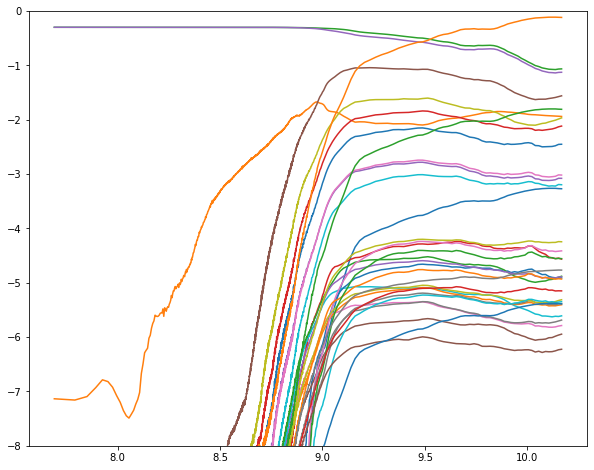

In [27]:
import matplotlib.pyplot as plt
import numpy as np
num_columns = len(df[columns_to_plot].columns[:-1])  # Exclude the X-axis column
print(num_columns)
plt.figure(figsize=(10, 8))
for i, column in enumerate(df[columns_to_plot].columns[:-1]):
    if max(df[column])>1.0e-6:
        plt.plot(np.log10(df["r_outer,"]), np.log10(df[column]), label=column)
    
#
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize='large')
plt.ylim(-8,0)